# Zajęcia 1

### Import potrzebnych bibliotek

In [105]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.collections as mcoll
import matplotlib.colors as mcolors
from matplotlib.widgets import Button
from random import uniform
from math import sin
from math import cos
from math import pi
import json as js

### Definiuję punkty A i B, tolerancje i kolory

In [118]:
A = [-1.0,0]
B = [0,0.1]
tolerances = [1e-18, 1e-14, 1e-10]
colors = np.array(['r', 'b', 'g'])

### Obliczanie wyznacznika 3x3

In [119]:
def det_2x2(matrix):
    return matrix[0][0]*matrix[1][1] - matrix[1][0]*matrix[0][1]


def det_3x3(matrix):
    output = 0
    output += matrix[0][0]*matrix[1][1]*matrix[2][2]
    output -= matrix[2][0]*matrix[1][1]*matrix[0][2]
    output += matrix[1][0]*matrix[2][1]*matrix[0][2]
    output -= matrix[0][0]*matrix[2][1]*matrix[1][2]
    output += matrix[2][0]*matrix[0][1]*matrix[1][2]
    output -= matrix[1][0]*matrix[0][1]*matrix[2][2]
    return output

### Generowanie punnktów ze zbioru A

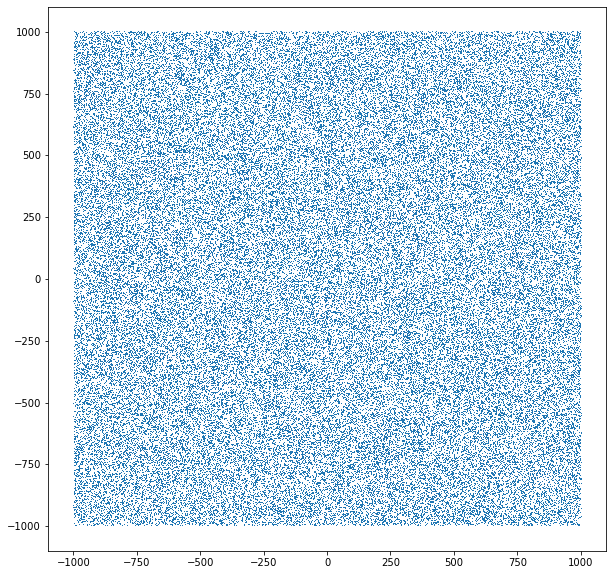

In [120]:
N_AB = 10 ** 5
RANGE_MIN_AB = -10 ** 3
RANGE_MAX_AB = 10 ** 3
points_Ax = [uniform(RANGE_MIN_AB, RANGE_MAX_AB) for _ in range(N_AB)]
points_Ay = [uniform(RANGE_MIN_AB, RANGE_MAX_AB) for _ in range(N_AB)]
plt.rcParams["figure.figsize"] = (10, 10)
plt.plot(points_Ax, points_Ay, ",")
plt.show()

### Generowanie punnktów ze zbioru B

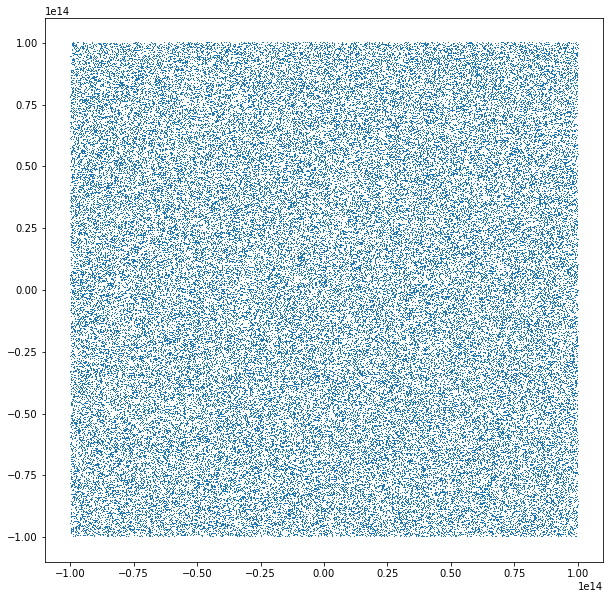

In [121]:
N_AB = 10 ** 5
RANGE_MIN_AB = -10 ** 14
RANGE_MAX_AB = 10 ** 14
points_Bx = [uniform(RANGE_MIN_AB,RANGE_MAX_AB) for _ in range(N_AB)]
points_By = [uniform(RANGE_MIN_AB,RANGE_MAX_AB) for _ in range(N_AB)]
plt.plot(points_Bx, points_By, ",")
plt.show()

### Generowanie punnktów ze zbioru C

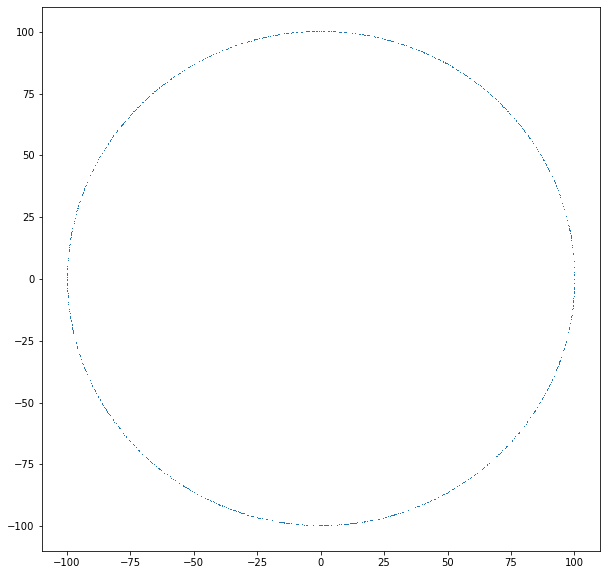

In [122]:
N_C = 10 ** 3
R = 100
points_Cx = []
points_Cy = []
for _ in range(N_C):
    t = uniform(0,2*pi)
    points_Cx.append(cos(t)*R)
    points_Cy.append(sin(t)*R)
plt.plot(points_Cx, points_Cy, ",")
plt.show()

### Generowanie punnktów ze zbioru D

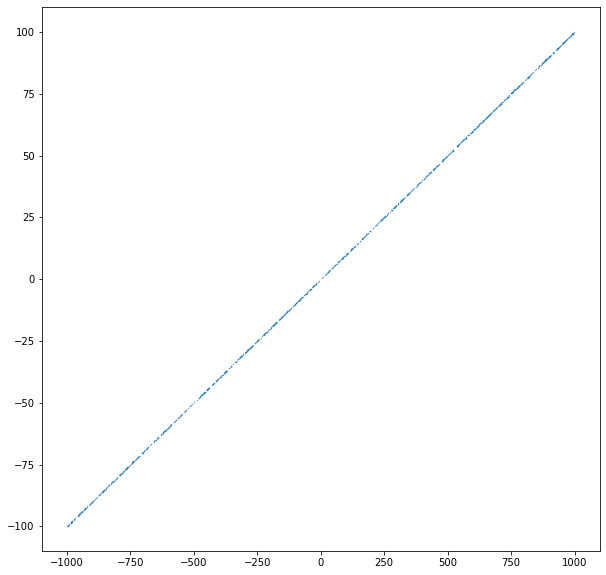

In [173]:
N_D = 10 ** 3
RANGE_MIN_D = -10 ** 3
RANGE_MAX_D = 10 ** 3
points_Dx = []
points_Dy = []
a = (A[1]-B[1])/(A[0]-B[0])
b = A[1] - A[0] *a
for _ in range (N_D):
    x = uniform(RANGE_MIN_D,RANGE_MAX_D)
    points_Dx.append(x)
    points_Dy.append(a*x+ b)
plt.scatter(points_Dx, points_Dy, s = 0.1)
plt.show()

# Rozdzielenie punktów ze względu na wyznaczniki i tolerancje

In [124]:
def group_points(X, Y):
    result_x = [[[[], [], []] for _ in range(3)] for _ in range(4)]
    result_y = [[[[], [], []] for _ in range(3)] for _ in range(4)]

    n = len(X)

    for point in range(n):
        x = X[point]
        y = Y[point]

        matrix3d = np.array([[A[0], A[1], 1],
                             [B[0], B[1], 1],
                             [x, y, 1]])

        matrix2d = np.array([[A[0] - x, A[1] - y],
                             [B[0] - x, B[1] - y]])
        dets = [np.linalg.det(matrix2d),
                det_2x2(matrix2d),
                np.linalg.det(matrix3d),
                det_3x3(matrix3d)]

        for det in range(len(dets)):
            for j in range(len(tolerances)):
                if abs(dets[det]) < tolerances[j]:
                    result_x[det][j][0].append(x)
                    result_y[det][j][0].append(y)
                elif dets[det] > 0:
                    result_x[det][j][1].append(x)
                    result_y[det][j][1].append(y)
                else:
                    result_x[det][j][2].append(x)
                    result_y[det][j][2].append(y)

    return result_x, result_y

In [125]:
xA, yA = group_points(points_Ax, points_Ay)
xB, yB = group_points(points_Bx, points_By)
xC, yC = group_points(points_Cx, points_Cy)
xD, yD = group_points(points_Dx, points_Dy)

# Graficzne zaprezentowanie wyników

##  Podział na typy wyznaczników:

### Zestaw A

Wyznacznik 2x2 z nnumpy

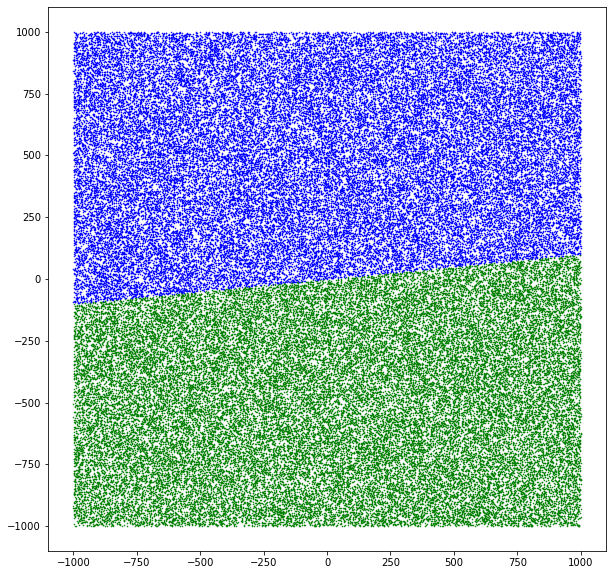

Punktów na prostej: 0
Punktów nad prostą: 50110
Punktów pod prostą: 49890


In [136]:
plt.rcParams["figure.figsize"] = (10,10)
for i in range(2, -1, -1):
    plt.scatter(xA[0][0][i], yA[0][0][i],s = 0.5,c=colors[i])
plt.show()
print('Punktów na prostej: ' + str(len(xA[0][0][0])))    
print('Punktów nad prostą: ' + str(len(xA[0][0][1])))
print('Punktów pod prostą: ' + str(len(xA[0][0][2])))


Wyznacznik 2x2 implementowany przeze mnie


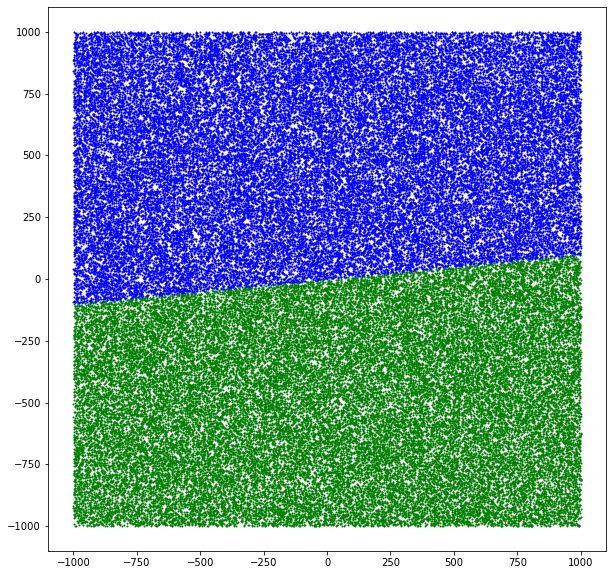

Punktów na prostej: 0
Punktów nad prostą: 50110
Punktów pod prostą: 49890


In [129]:
for i in range(2, -1, -1):
    plt.scatter(xA[1][0][i], yA[1][0][i],s = 0.5,c=colors[i])
plt.show()
print('Punktów na prostej: ' + str(len(xA[1][0][0])))
print('Punktów nad prostą: ' + str(len(xA[1][0][1])))
print('Punktów pod prostą: ' + str(len(xA[1][0][2])))

wyznacznik 3x3 z numpy

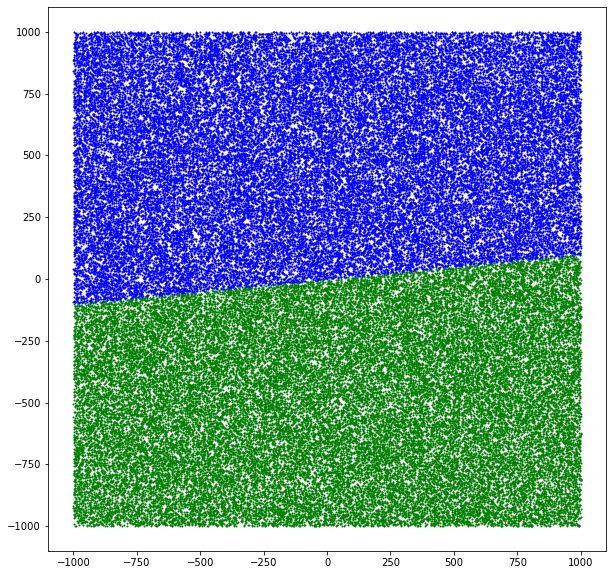

Punktów na prostej: 0
Punktów nad prostą: 50110
Punktów pod prostą: 49890


In [130]:
for i in range(2, -1, -1):
    plt.scatter(xA[2][0][i], yA[2][0][i],s = 0.5,c=colors[i])
plt.show()
print('Punktów na prostej: ' + str(len(xA[2][0][0])))
print('Punktów nad prostą: ' + str(len(xA[2][0][1])))
print('Punktów pod prostą: ' + str(len(xA[2][0][2])))

wyznacznik 3x3 zaimplementowany przeze mnie

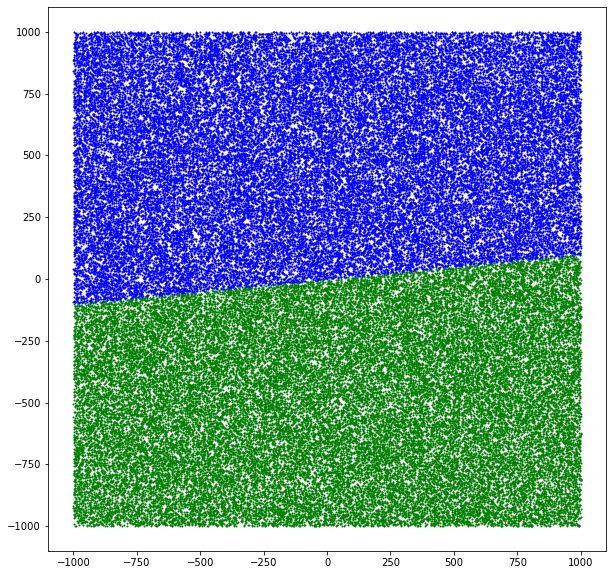

Punktów na prostej: 0
Punktów nad prostą: 50110
Punktów pod prostą: 49890


In [131]:
for i in range(2, -1, -1):
    plt.scatter(xA[3][0][i], yA[3][0][i],s = 0.5,c=colors[i])
plt.show()
print('Punktów na prostej: ' + str(len(xA[3][0][0])))
print('Punktów nad prostą: ' + str(len(xA[3][0][1])))
print('Punktów pod prostą: ' + str(len(xA[3][0][2])))

### Zestaw B

wyznacznik 2x2 z numpy

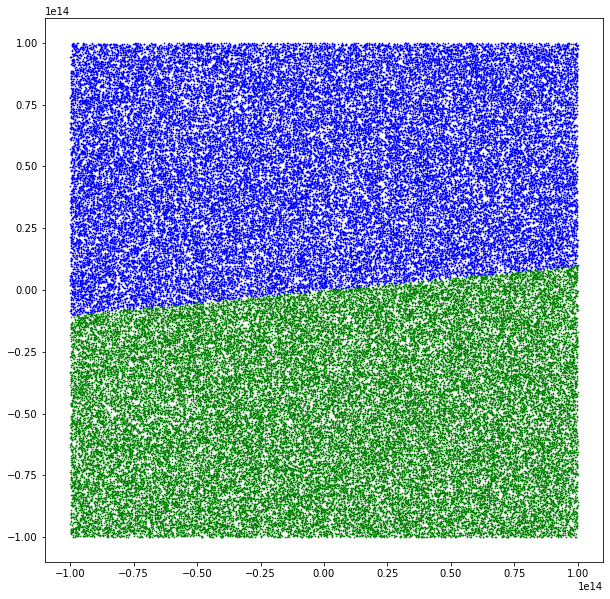

Punktów na prostej: 0
Punktów nad prostą: 49973
Punktów pod prostą: 50027


In [140]:
for i in range(2, -1, -1):
    plt.scatter(xB[0][0][i], yB[0][0][i],s = 0.5,c=colors[i])
plt.show()
print('Punktów na prostej: ' + str(len(xB[0][0][0])))
print('Punktów nad prostą: ' + str(len(xB[0][0][1])))
print('Punktów pod prostą: ' + str(len(xB[0][0][2])))

wyznacznik 2x2 mojej implementacji

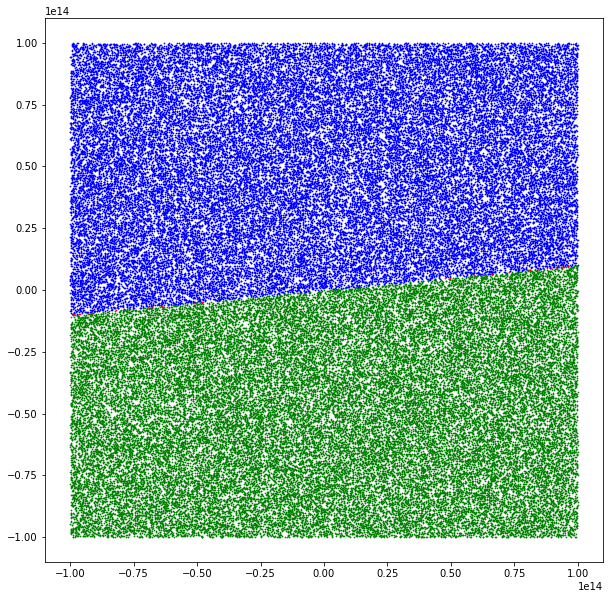

Punktów na prostej: 31
Punktów nad prostą: 49952
Punktów pod prostą: 50017


In [174]:
for i in range(2, -1, -1):
    plt.scatter(xB[1][0][i], yB[1][0][i],s = 0.5,c=colors[i])
plt.show()
print('Punktów na prostej: ' + str(len(xB[1][0][0])))
print('Punktów nad prostą: ' + str(len(xB[1][0][1])))
print('Punktów pod prostą: ' + str(len(xB[1][0][2])))


wyznacznik 3x3 z numpy

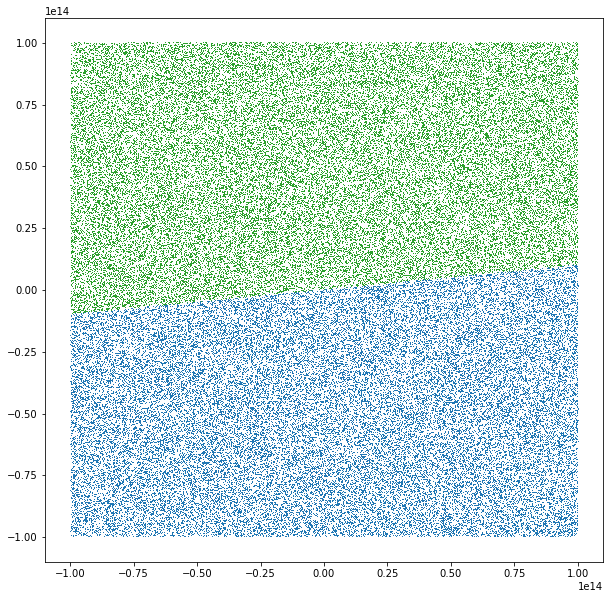

Punktów na prostej: 0
Punktów nad prostą: 50103
Punktów pod prostą: 49897


In [65]:
for i in range(2, -1, -1):
    plt.scatter(xB[2][0][i], yB[2][0][i],s = 0.5,c=colors[i])
plt.show()
print('Punktów na prostej: ' + str(len(xB[2][0][0])))
print('Punktów nad prostą: ' + str(len(xB[2][0][1])))
print('Punktów pod prostą: ' + str(len(xB[2][0][2])))


wyznacznik 3x3 mojej implementacji

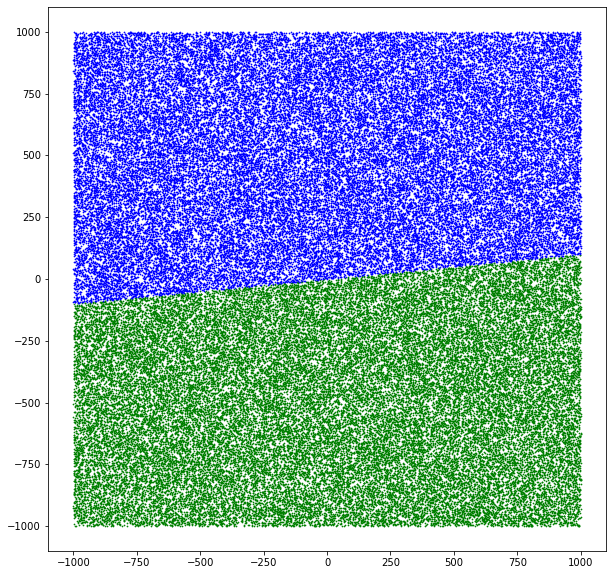

Punktów na prostej: 0
Punktów nad prostą: 49971
Punktów pod prostą: 50029


In [137]:
for i in range(2, -1, -1):
    plt.scatter(xB[3][0][i], yB[3][0][i],s = 0.5,c=colors[i])
plt.show()
print('Punktów na prostej: ' + str(len(xB[3][0][0])))
print('Punktów nad prostą: ' + str(len(xB[3][0][1])))
print('Punktów pod prostą: ' + str(len(xB[3][0][2])))

### Zestaw C

wyznacznik 2x2 z numpy

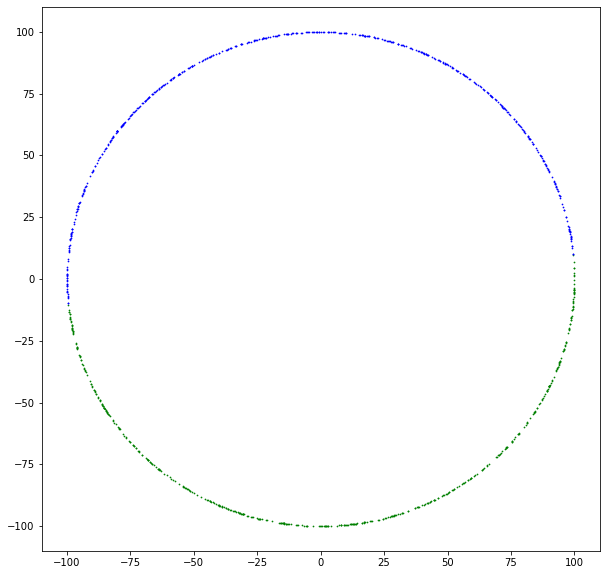

Punktów na prostej: 0
Punktów nad prostą: 514
Punktów pod prostą: 486


In [142]:
for i in range(2, -1, -1):
    plt.scatter(xC[0][0][i], yC[0][0][i],s = 1,c=colors[i])
plt.show()
print('Punktów na prostej: ' + str(len(xC[0][0][0])))
print('Punktów nad prostą: ' + str(len(xC[0][0][1])))
print('Punktów pod prostą: ' + str(len(xC[0][0][2])))

wyznacznik 2x2 mojej implementacji

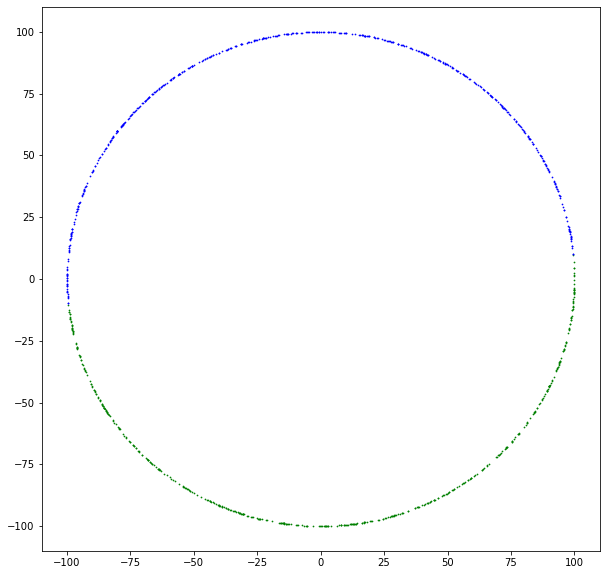

Punktów na prostej: 0
Punktów nad prostą: 514
Punktów pod prostą: 486


In [143]:
for i in range(2, -1, -1):
    plt.scatter(xC[1][0][i], yC[1][0][i],s = 1,c=colors[i])
plt.show()
print('Punktów na prostej: ' + str(len(xC[1][0][0])))
print('Punktów nad prostą: ' + str(len(xC[1][0][1])))
print('Punktów pod prostą: ' + str(len(xC[1][0][2])))

wyznacznik 3x3 z numpy

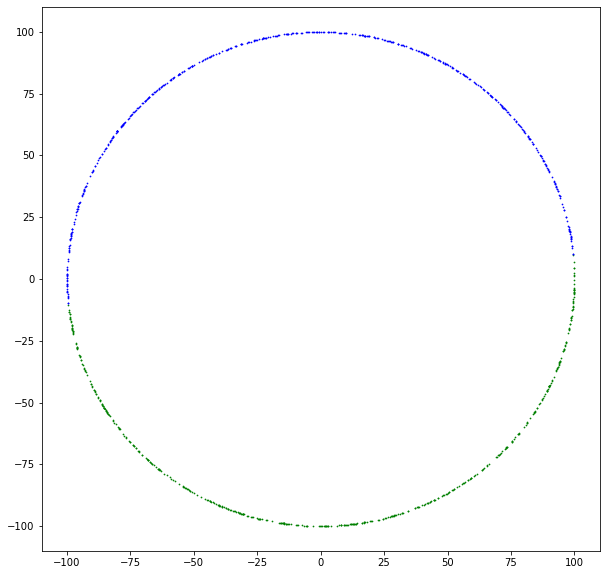

Punktów na prostej: 0
Punktów nad prostą: 514
Punktów pod prostą: 486


In [144]:
for i in range(2, -1, -1):
    plt.scatter(xC[2][0][i], yC[2][0][i],s = 1,c=colors[i])
plt.show()
print('Punktów na prostej: ' + str(len(xC[2][0][0])))
print('Punktów nad prostą: ' + str(len(xC[2][0][1])))
print('Punktów pod prostą: ' + str(len(xC[2][0][2])))

wyznacznik 3x3 mojej implementacji

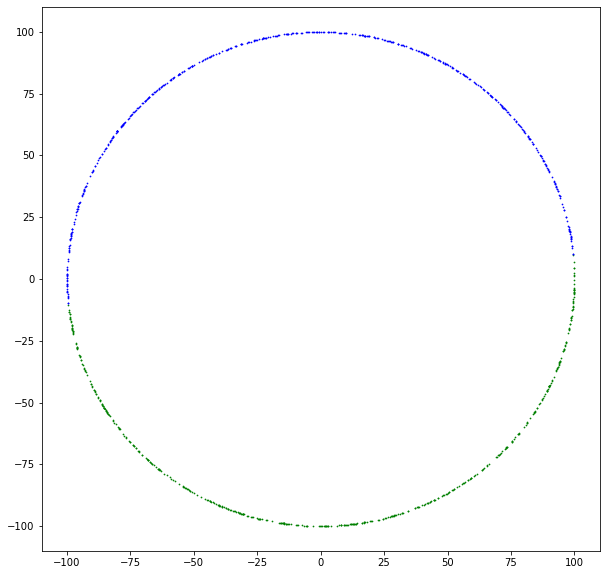

Punktów na prostej: 0
Punktów nad prostą: 514
Punktów pod prostą: 486


In [145]:
for i in range(2, -1, -1):
    plt.scatter(xC[3][0][i], yC[3][0][i],s = 1,c=colors[i])
plt.show()
print('Punktów na prostej: ' + str(len(xC[3][0][0])))
print('Punktów nad prostą: ' + str(len(xC[3][0][1])))
print('Punktów pod prostą: ' + str(len(xC[3][0][2])))

### Zestaw D

wyznacznik 2x2 z numpy

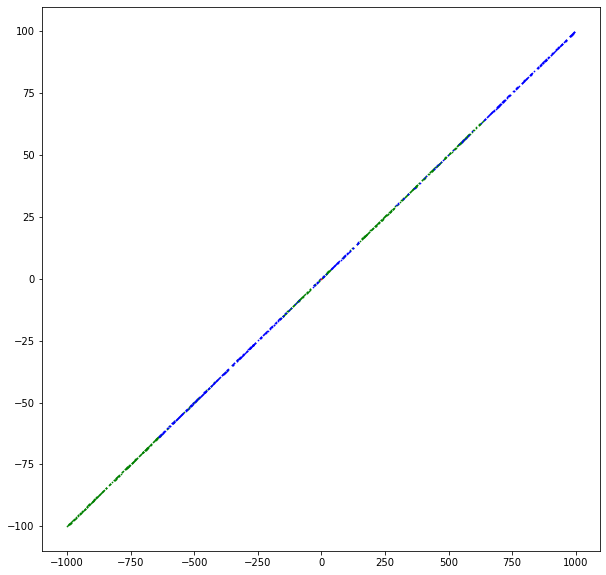

Punktów na prostej: 1
Punktów nad prostą: 483
Punktów pod prostą: 516


In [146]:
for i in range(2, -1, -1):
    plt.scatter(xD[0][0][i], yD[0][0][i],s = 1,c=colors[i])
plt.show()
print('Punktów na prostej: ' + str(len(xD[0][0][0])))
print('Punktów nad prostą: ' + str(len(xD[0][0][1])))
print('Punktów pod prostą: ' + str(len(xD[0][0][2])))


wyznacznik 2x2 mojej implementacji

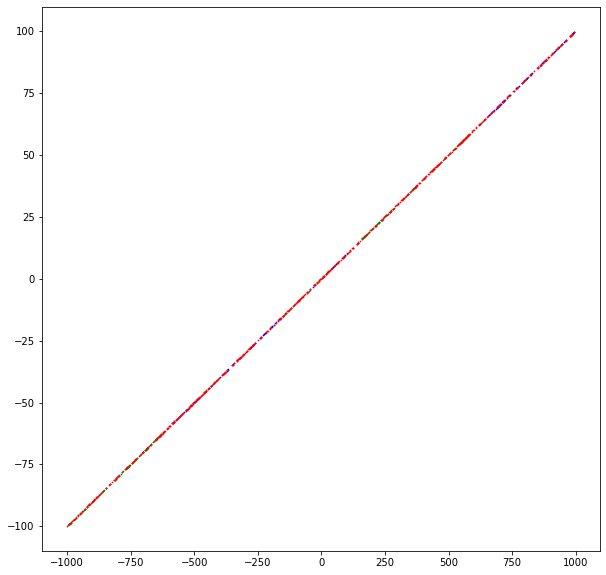

Punktów na prostej: 676
Punktów nad prostą: 152
Punktów pod prostą: 172


In [147]:
for i in range(2, -1, -1):
    plt.scatter(xD[1][0][i], yD[1][0][i],s = 1,c=colors[i])
plt.show()
print('Punktów na prostej: ' + str(len(xD[1][0][0])))
print('Punktów nad prostą: ' + str(len(xD[1][0][1])))
print('Punktów pod prostą: ' + str(len(xD[1][0][2])))


wyznacznik 3x3 z numpy

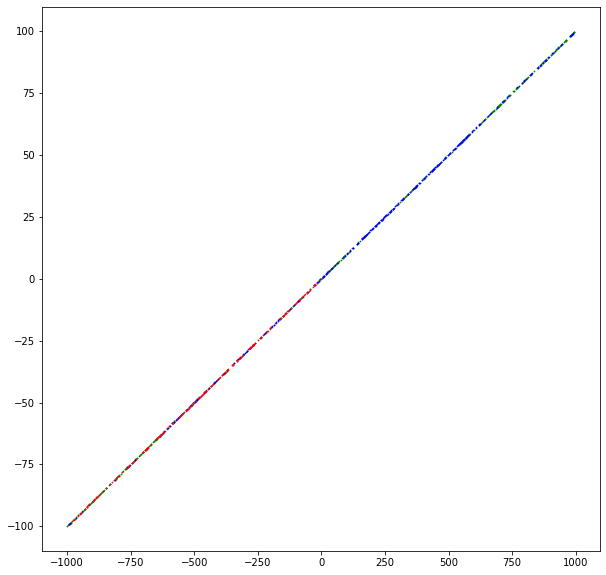

Punktów na prostej: 214
Punktów nad prostą: 372
Punktów pod prostą: 414


In [148]:
for i in range(2, -1, -1):
    plt.scatter(xD[2][0][i], yD[2][0][i],s = 1,c=colors[i])
plt.show()
print('Punktów na prostej: ' + str(len(xD[2][0][0])))
print('Punktów nad prostą: ' + str(len(xD[2][0][1])))
print('Punktów pod prostą: ' + str(len(xD[2][0][2])))

wyznacznik 3x3 mojej implementacji

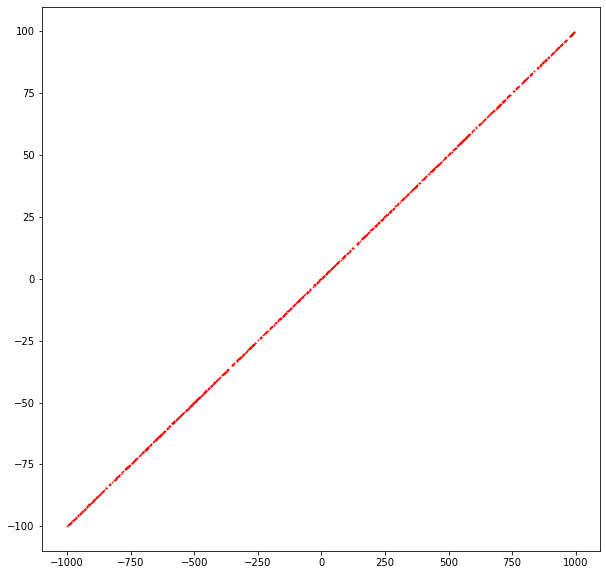

Punktów na prostej: 1000
Punktów nad prostą: 0
Punktów pod prostą: 0


In [149]:
for i in range(2, -1, -1):
    plt.scatter(xD[3][0][i], yD[3][0][i],s = 1,c=colors[i])
plt.show()
print('Punktów na prostej: ' + str(len(xD[3][0][0])))
print('Punktów nad prostą: ' + str(len(xD[3][0][1])))
print('Punktów pod prostą: ' + str(len(xD[3][0][2])))

# Różnice w ilościach

In [78]:
def find_diff(X, Y, det1, det2, tol):
    pointsA = []
    pointsB = []

    len_A_pod = len(X[det1][tol][2])
    len_B_pod = len(X[det2][tol][2])
    len_A_nad = len(X[det1][tol][1])
    len_B_nad = len(X[det2][tol][1])
    len_A_nalini = len(X[det1][tol][0])
    len_B_nalini = len(X[det2][tol][0])

    for i in range(len_A_pod):
        x = X[det1][tol][2][i]
        y = Y[det1][tol][2][i]
        pointsA.append(((x, y), -1))

    for i in range(len_B_pod):
        x = X[det2][tol][2][i]
        y = Y[det2][tol][2][i]
        pointsB.append(((x, y), -1))

    for i in range(len_A_nad):
        x = X[det1][tol][1][i]
        y = Y[det1][tol][1][i]
        pointsA.append(((x, y), 1))

    for i in range(len_B_nad):
        x = X[det2][tol][1][i]
        y = Y[det2][tol][1][i]
        pointsB.append(((x, y), 1))

    for i in range(len_A_nalini):
        x = X[det1][tol][0][i]
        y = Y[det1][tol][0][i]
        pointsA.append(((x, y), 0))

    for i in range(len_B_nalini):
        x = X[det2][tol][0][i]
        y = Y[det2][tol][0][i]
        pointsB.append(((x, y), 0))

    pointsA.sort()
    pointsB.sort()

    n = len(pointsA)
    results = []
    for i in range(n):
        if pointsA[i][1] != pointsB[i][1]:
            results.append(pointsA[i][0])

    return results

In [91]:
def print_diff(x, y, det1, det2, tol):
    diff = find_diff(x, y, det1, det2, tol)
    print("Różnic: " + str(len(diff)))

    for i in range(min(10, len(diff))):
        print('x: ' + str(diff[i][0]) + ', y: ' + str(diff[i][1]))

    if len(diff) > 10:
        print('i jeszcze ' + str(len(diff) - 10) + ' punktów...')

    if len(diff) != 0:
        plt.plot([i[0] for i in diff], [i[1] for i in diff])
        plt.show()

### Zestaw A

2x2 z numpy i mój

In [92]:
print_diff(xA, yA, 0, 1, 0,)

Różnic: 0


3x3 z numpy i mój

In [93]:
print_diff(xA, yA, 2, 3, 0,)

Różnic: 0


### Zestaw B

2x2 z numpy i mój

Różnic: 32
x: -99110973092190.03, y: -9859760834937.14
x: -98584644515416.0, y: -9744854271179.5
x: -96738590228300.16, y: -9524734655307.25
x: -96225653912614.11, y: -9519062493639.656
x: -93112036192069.61, y: -9264039131758.0
x: -91278173216559.89, y: -9109894132001.562
x: -81842393689953.0, y: -8224717285226.422
x: -76945481333187.16, y: -7652802536127.609
x: -69349845562418.44, y: -6922606462543.547
x: -67696194800743.914, y: -6714102096780.469
i jeszcze 22 punktów...


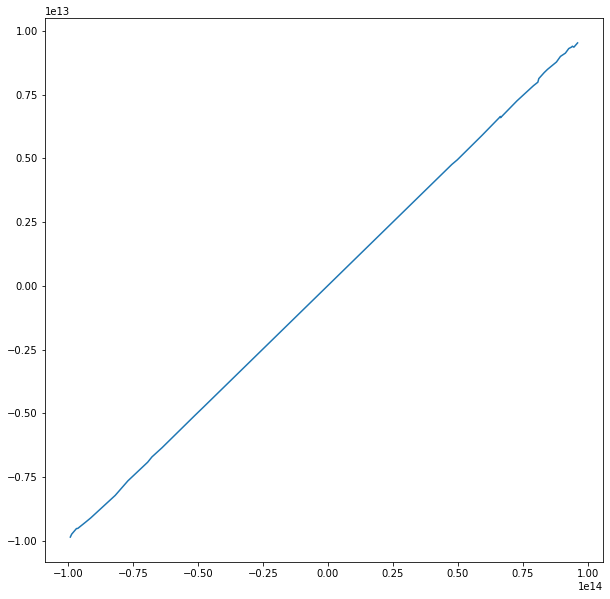

In [177]:
print_diff(xB, yB, 0, 1, 0)

3x3 z numpy i mój

In [95]:
print_diff(xB, yB, 2, 3, 0,)

Różnic: 0


### Zestaw C

2x2 z numpy i mój

In [96]:
print_diff(xC, yC, 0, 1, 0,)

Różnic: 0


3x3 z numpy i mój

In [97]:
print_diff(xC, yC, 2, 3, 0,)

Różnic: 0


### Zestaw D

2x2 z numpy i mój

Różnic: 695
x: -999.5332702248694, y: -99.85332702248695
x: -991.7861521371691, y: -99.07861521371692
x: -991.1171408807955, y: -99.01171408807957
x: -990.7910515762263, y: -98.97910515762264
x: -989.1437777815712, y: -98.81437777815714
x: -985.932049952758, y: -98.49320499527582
x: -979.6225210503993, y: -97.86225210503994
x: -976.9656652308656, y: -97.59656652308658
x: -968.9773374839385, y: -96.79773374839387
x: -965.6711172790265, y: -96.46711172790266
i jeszcze 685 punktów...


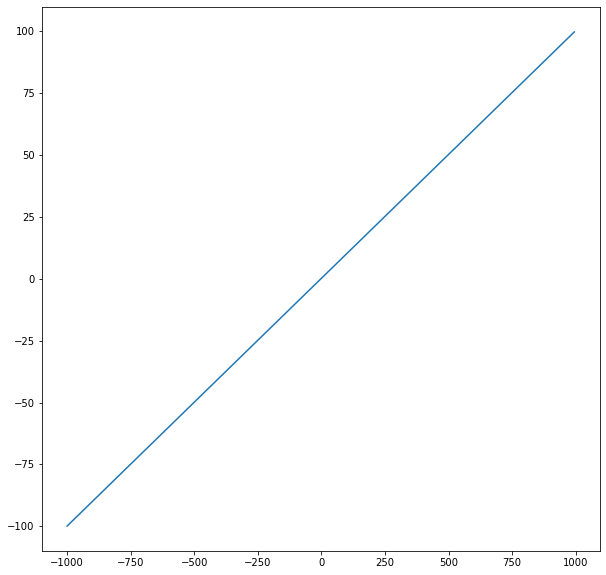

In [180]:
print_diff(xD, yD, 0, 1, 0)

3x3 z numpy i mój

Różnic: 786
x: -999.5332702248694, y: -99.85332702248695
x: -992.7150466386552, y: -99.17150466386553
x: -991.7861521371691, y: -99.07861521371692
x: -991.1171408807955, y: -99.01171408807957
x: -990.7910515762263, y: -98.97910515762264
x: -989.1437777815712, y: -98.81437777815714
x: -988.6353780702235, y: -98.76353780702236
x: -985.932049952758, y: -98.49320499527582
x: -985.7938084008296, y: -98.47938084008297
x: -984.7468976825402, y: -98.37468976825403
i jeszcze 776 punktów...


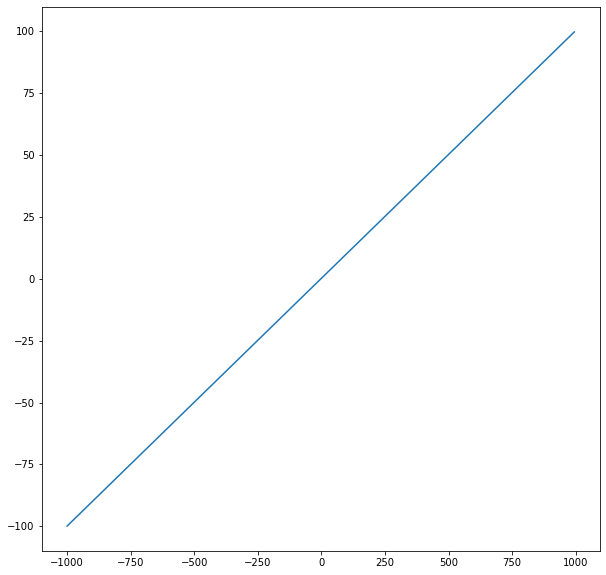

In [181]:
print_diff(xD, yD, 2, 3, 0,)

# Różnice w klasyfikacji dla różnych warości epsilon

In [226]:
tol_string = ['1e-18', '1e-14', '1e-10']
def generate_bar_diagram(x, det):
    fig, ax = plt.subplots(figsize = (12, 8))
    bar_width = 0.25
    
    under  = [len(x[det][0][2]), len(x[det][1][2]), len(x[det][2][2])]
    above  = [len(x[det][0][1]), len(x[det][1][1]), len(x[det][2][1])]
    linear = [len(x[det][0][0]), len(x[det][1][0]), len(x[det][2][0])]
    
    bar1 = np.arange(3)
    bar2 = [x + bar_width for x in bar1]
    bar3 = [x + bar_width for x in bar2]
    
    plt.bar(bar1, under, color = 'b', width = bar_width, label = 'Pod prostą', data = under)
    plt.bar(bar2, above, color = 'g', width = bar_width, label = 'Nad prostą')
    plt.bar(bar3, linear, color = 'r', width = bar_width, label = 'Na prostej')
    
    plt.xlabel('Tolerancja', fontweight = 'bold', fontsize = 15)
    plt.ylabel('Liczba ', fontweight = 'bold', fontsize = 15)
    plt.xticks([(r + bar_width) for r in range(len(under))], tol_string)
    
    plt.legend()
    plt.show()
    print(f"                   Pod :  Nad  : Na linii")
    print(f"Precyzja {tol_string[0]} : {str(under[0])} : {str(above[0])} : {str(linear[0])}")
    print(f"Precyzja {tol_string[1]} : {str(under[1])} : {str(above[1])} : {str(linear[1])}")
    print(f"Precyzja {tol_string[2]} : {str(under[2])} : {str(above[2])} : {str(linear[2])}")

### Zestaw A

2x2 numpy

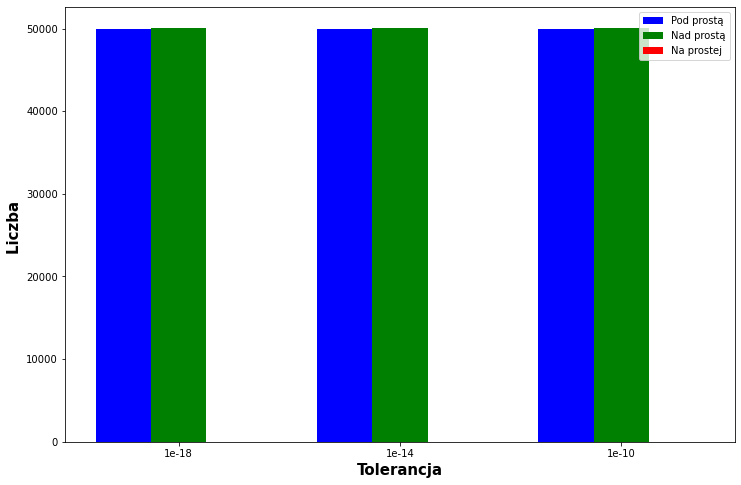

                   Pod :  Nad  : Na linii
Precyzja 1e-18 : 49890 : 50110 : 0
Precyzja 1e-14 : 49890 : 50110 : 0
Precyzja 1e-10 : 49890 : 50110 : 0


In [227]:
generate_bar_diagram(xA, 0)

2x2 mój

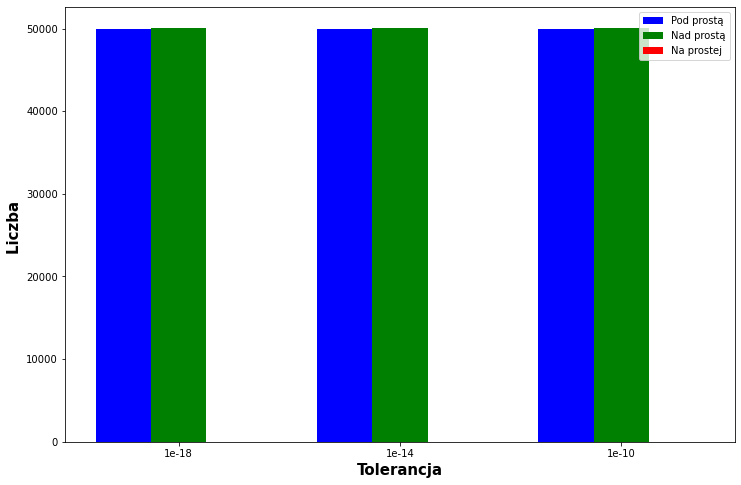

                   Pod :  Nad  : Na linii
Precyzja 1e-18 : 49890 : 50110 : 0
Precyzja 1e-14 : 49890 : 50110 : 0
Precyzja 1e-10 : 49890 : 50110 : 0


In [209]:
generate_bar_diagram(xA, 1)

3x3 numpy

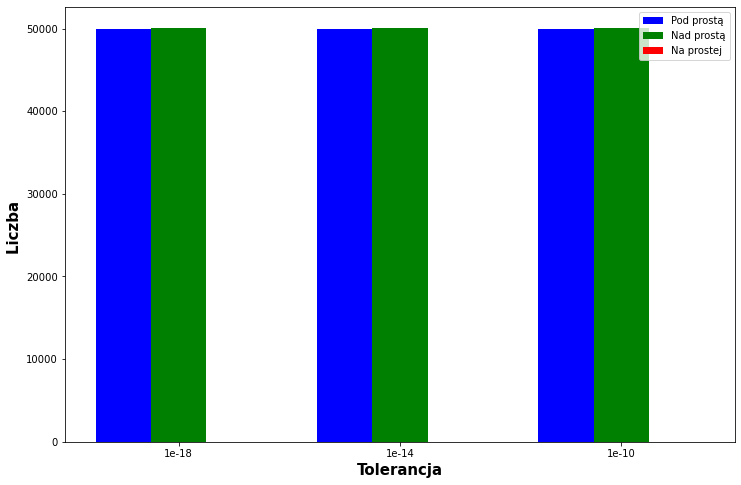

                   Pod :  Nad  : Na linii
Precyzja 1e-18 : 49890 : 50110 : 0
Precyzja 1e-14 : 49890 : 50110 : 0
Precyzja 1e-10 : 49890 : 50110 : 0


In [210]:
generate_bar_diagram(xA, 2)

3x3 mój

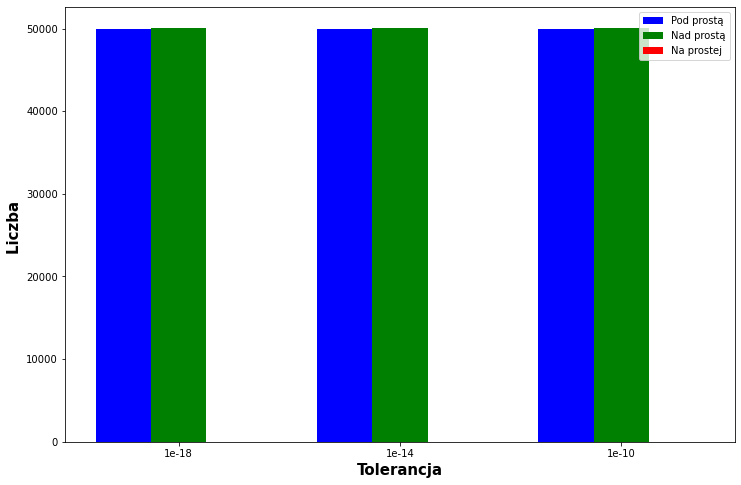

                   Pod :  Nad  : Na linii
Precyzja 1e-18 : 49890 : 50110 : 0
Precyzja 1e-14 : 49890 : 50110 : 0
Precyzja 1e-10 : 49890 : 50110 : 0


In [211]:
generate_bar_diagram(xA, 3)

### Zestaw B

2x2 numpy

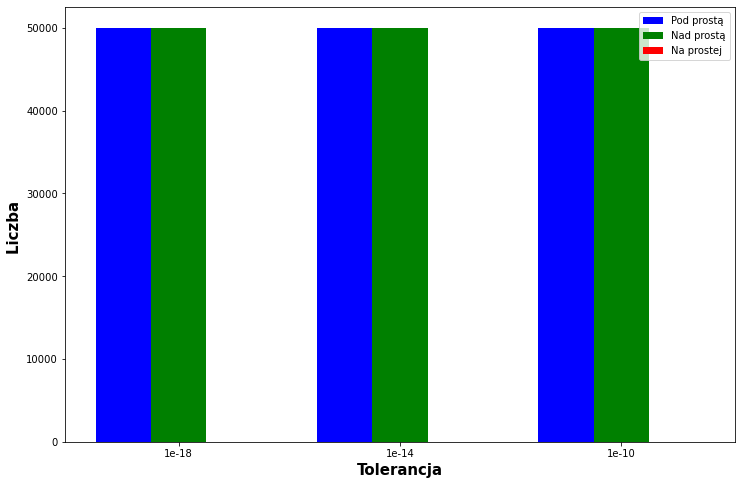

                   Pod :  Nad  : Na linii
Precyzja 1e-18 : 50027 : 49973 : 0
Precyzja 1e-14 : 50027 : 49973 : 0
Precyzja 1e-10 : 50027 : 49973 : 0


In [212]:
generate_bar_diagram(xB, 0)

2x2 mój

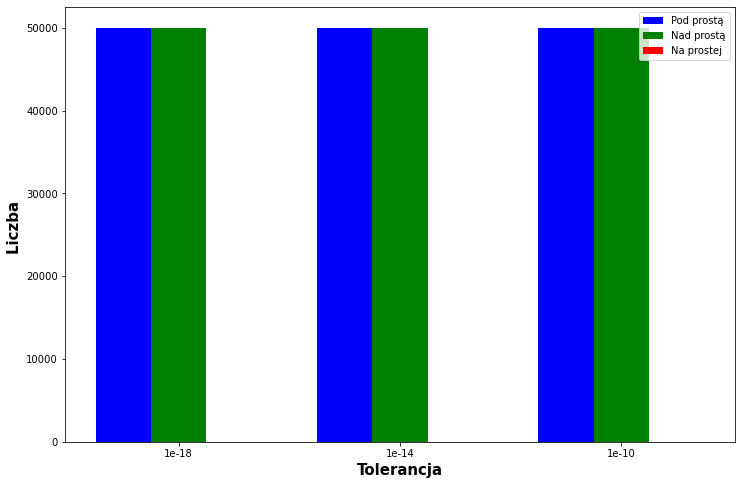

                   Pod :  Nad  : Na linii
Precyzja 1e-18 : 50017 : 49952 : 31
Precyzja 1e-14 : 50017 : 49952 : 31
Precyzja 1e-10 : 50017 : 49952 : 31


In [213]:
generate_bar_diagram(xB, 1)

3x3 numpy

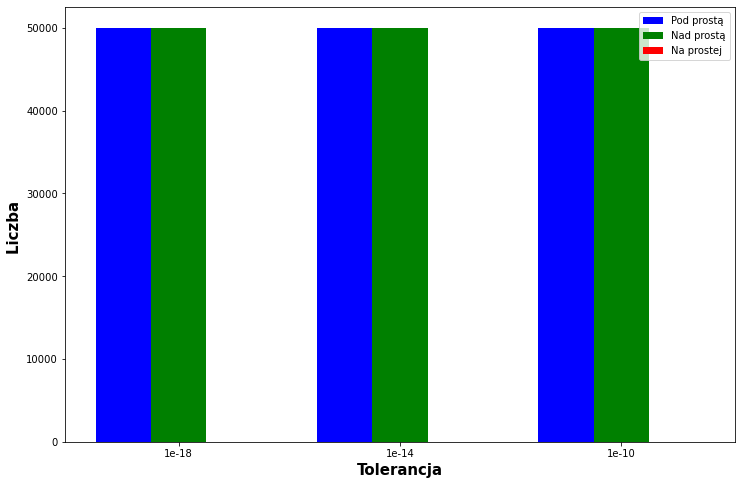

                   Pod :  Nad  : Na linii
Precyzja 1e-18 : 50029 : 49971 : 0
Precyzja 1e-14 : 50029 : 49971 : 0
Precyzja 1e-10 : 50029 : 49971 : 0


In [214]:
generate_bar_diagram(xB, 2)

3x3 mój

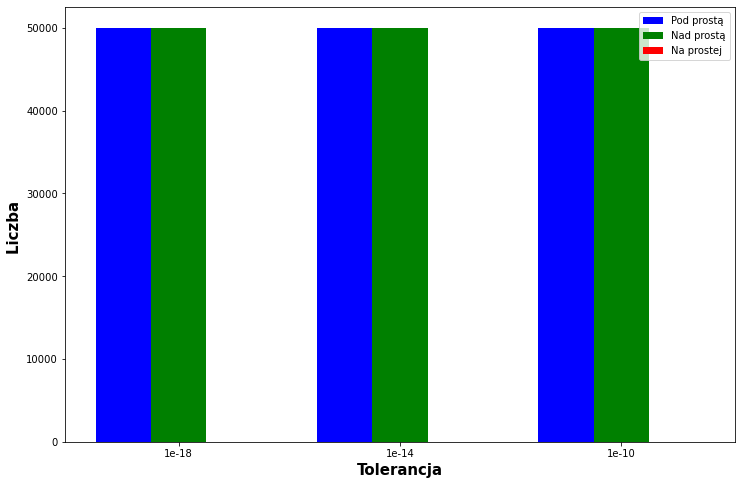

                   Pod :  Nad  : Na linii
Precyzja 1e-18 : 50029 : 49971 : 0
Precyzja 1e-14 : 50029 : 49971 : 0
Precyzja 1e-10 : 50029 : 49971 : 0


In [215]:
generate_bar_diagram(xB, 3)

### Zestaw C

2x2 numpy

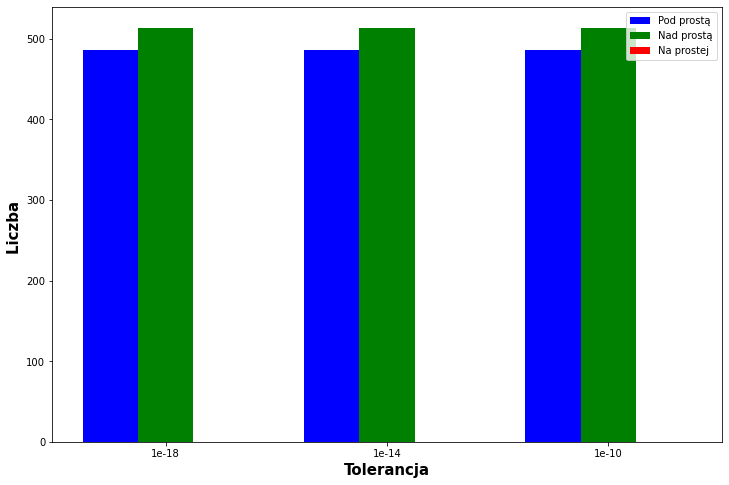

                   Pod :  Nad  : Na linii
Precyzja 1e-18 : 486 : 514 : 0
Precyzja 1e-14 : 486 : 514 : 0
Precyzja 1e-10 : 486 : 514 : 0


In [216]:
generate_bar_diagram(xC, 0)

2x2 mój

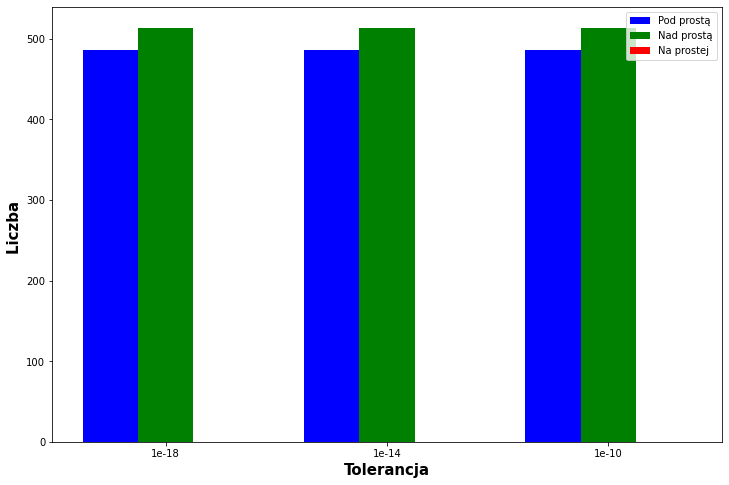

                   Pod :  Nad  : Na linii
Precyzja 1e-18 : 486 : 514 : 0
Precyzja 1e-14 : 486 : 514 : 0
Precyzja 1e-10 : 486 : 514 : 0


In [217]:
generate_bar_diagram(xC, 1)

3x3 numpy

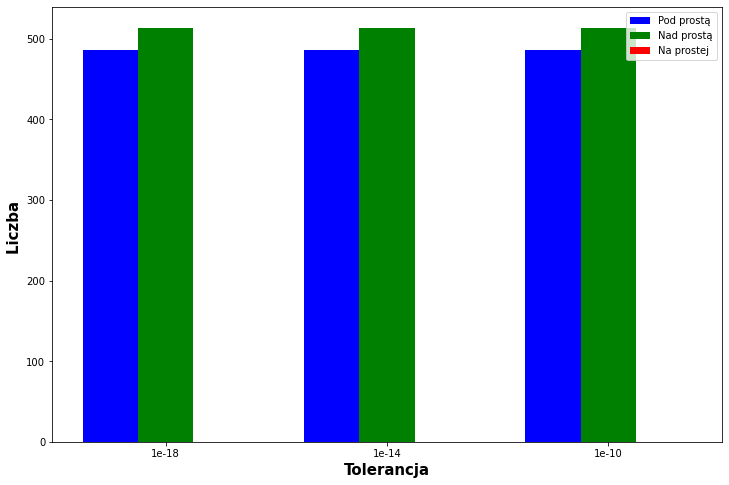

                   Pod :  Nad  : Na linii
Precyzja 1e-18 : 486 : 514 : 0
Precyzja 1e-14 : 486 : 514 : 0
Precyzja 1e-10 : 486 : 514 : 0


In [218]:
generate_bar_diagram(xC, 2)

3x3 mój

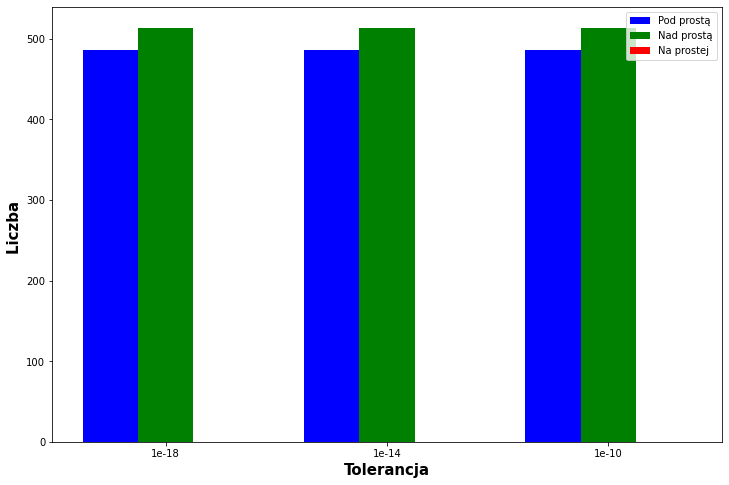

                   Pod :  Nad  : Na linii
Precyzja 1e-18 : 486 : 514 : 0
Precyzja 1e-14 : 486 : 514 : 0
Precyzja 1e-10 : 486 : 514 : 0


In [219]:
generate_bar_diagram(xC, 3)

### Zestaw D

2x2 numpy

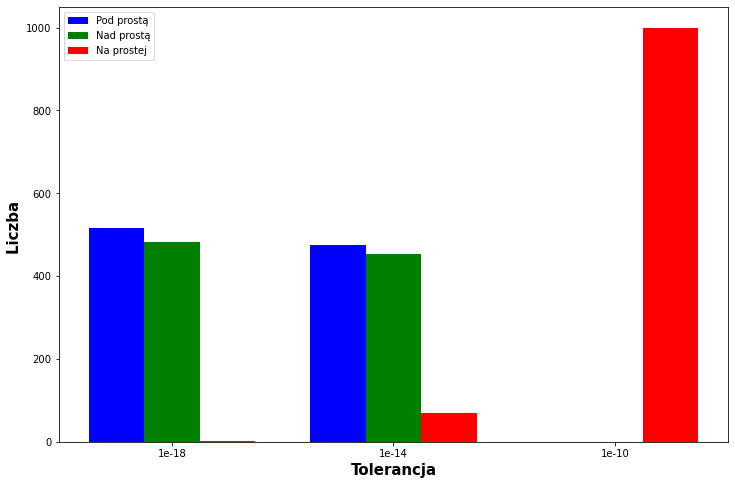

                   Pod :  Nad  : Na linii
Precyzja 1e-18 : 516 : 483 : 1
Precyzja 1e-14 : 476 : 454 : 70
Precyzja 1e-10 : 0 : 0 : 1000


In [220]:
generate_bar_diagram(xD, 0)

2x2 mój

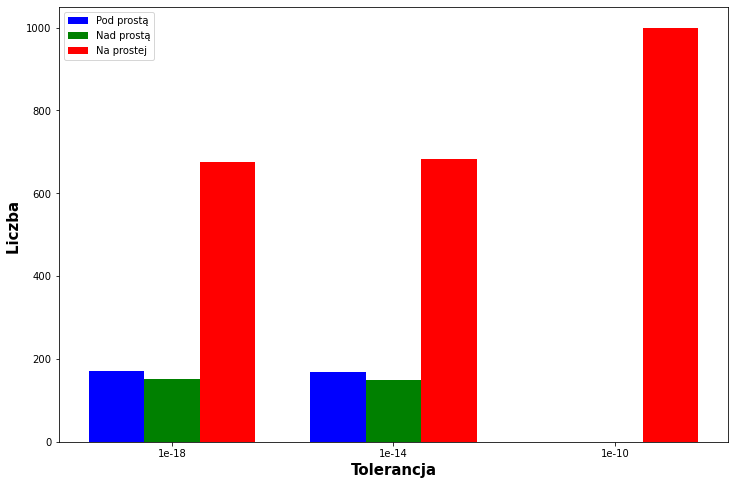

                   Pod :  Nad  : Na linii
Precyzja 1e-18 : 172 : 152 : 676
Precyzja 1e-14 : 168 : 150 : 682
Precyzja 1e-10 : 0 : 0 : 1000


In [221]:
generate_bar_diagram(xD, 1)

3x3 numpy

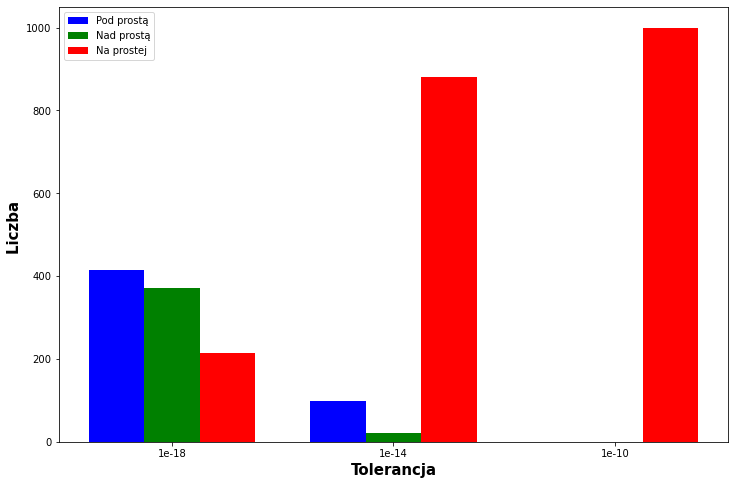

                   Pod :  Nad  : Na linii
Precyzja 1e-18 : 414 : 372 : 214
Precyzja 1e-14 : 98 : 22 : 880
Precyzja 1e-10 : 0 : 0 : 1000


In [222]:
generate_bar_diagram(xD, 2)

3x3 mój

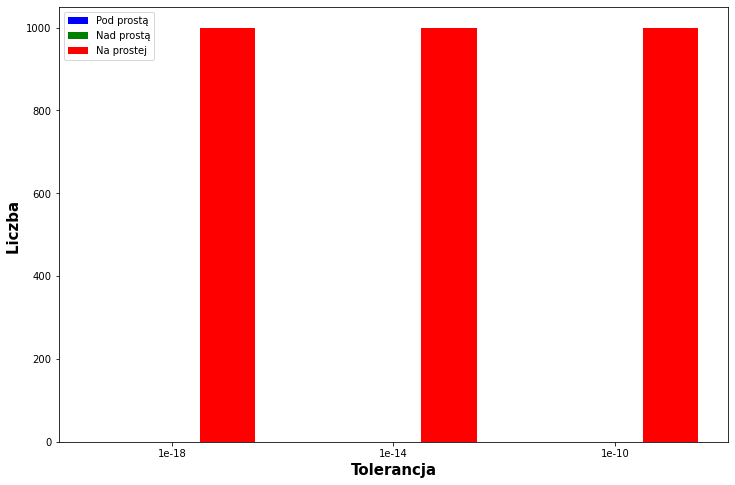

                   Pod :  Nad  : Na linii
Precyzja 1e-18 : 0 : 0 : 1000
Precyzja 1e-14 : 0 : 0 : 1000
Precyzja 1e-10 : 0 : 0 : 1000


In [223]:
generate_bar_diagram(xD, 3)